<a href="https://colab.research.google.com/github/S7vagithub/orca_tddft/blob/main/plot_tddft_stk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

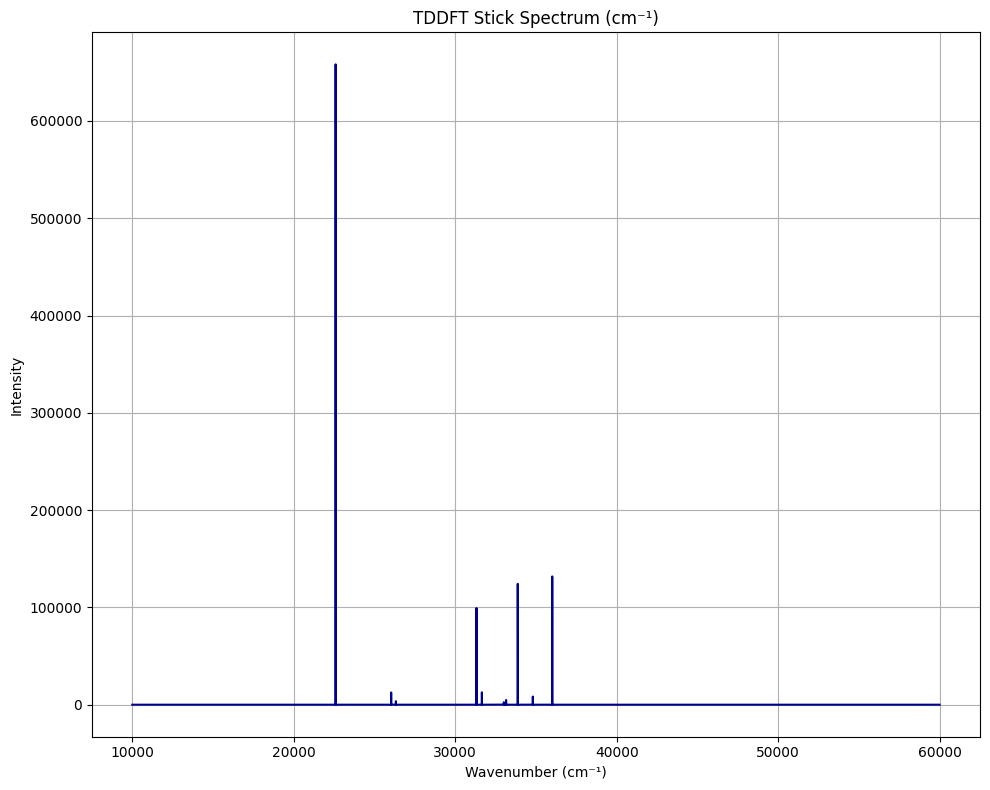

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === USER PARAMETERS ===
fwhm = 1  # Full Width at Half Maximum in cm^-1
nu_min = 10000  # Minimum wavenumber (cm^-1)
nu_max = 60000  # Maximum wavenumber (cm^-1)
resolution = 1.0  # Step size for spectrum grid (cm^-1)

input_file = "RhB_1_1_gs_opt_b3lyp_def2tzvp_10st_s_t_tddft_sp_cpcm_water.out.abs.stk"  # Your input stick spectrum file

# === READ STICK SPECTRUM ===
data = np.loadtxt(input_file)
wavenumbers = data[:, 0]
osc_strengths = data[:, 1]

# === CREATE WAVENUMBER GRID ===
nu_grid = np.arange(nu_min, nu_max, resolution)

# === CONVERT FWHM TO STANDARD DEVIATION ===
sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))

# === APPLY GAUSSIAN BROADENING ===
spectrum = np.zeros_like(nu_grid)
for i in range(len(wavenumbers)):
    gauss = osc_strengths[i] * np.exp(-0.5 * ((nu_grid - wavenumbers[i]) / sigma)**2)
    spectrum += gauss

# === SAVE WAVENUMBER VS INTENSITY ===
np.savetxt("broadened_spectrum_cm-1.dat",
           np.column_stack([nu_grid, spectrum]),
           header="Wavenumber(cm-1)    Intensity", fmt="%.2f %.6e")

# === CONVERT TO WAVELENGTH ===
wavelength_grid = 1e7 / nu_grid  # Convert to nm
sort_idx = np.argsort(wavelength_grid)
wavelength_grid = wavelength_grid[sort_idx]
spectrum_wavelength = spectrum[sort_idx]

# === SAVE WAVELENGTH VS INTENSITY ===
np.savetxt("broadened_spectrum_nm.dat",
           np.column_stack([wavelength_grid, spectrum_wavelength]),
           header="Wavelength(nm)    Intensity", fmt="%.2f %.6e")

# === PLOT RESULTS ===
plt.figure(figsize=(10, 8))

#plt.subplot(1, 2, 1)
plt.plot(nu_grid, spectrum, color='darkblue')
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Intensity")
plt.title("TDDFT Stick Spectrum (cm⁻¹)")
plt.grid(True)

#plt.subplot(1, 2, 2)
#plt.plot(wavelength_grid, spectrum_wavelength, color='darkgreen')
#plt.xlabel("Wavelength (nm)")
#plt.ylabel("Intensity")
#plt.title("Broadened Spectrum (nm)")
#plt.grid(True)

plt.tight_layout()
plt.savefig("broadened_spectrum_plot.png", dpi=300)
plt.show()


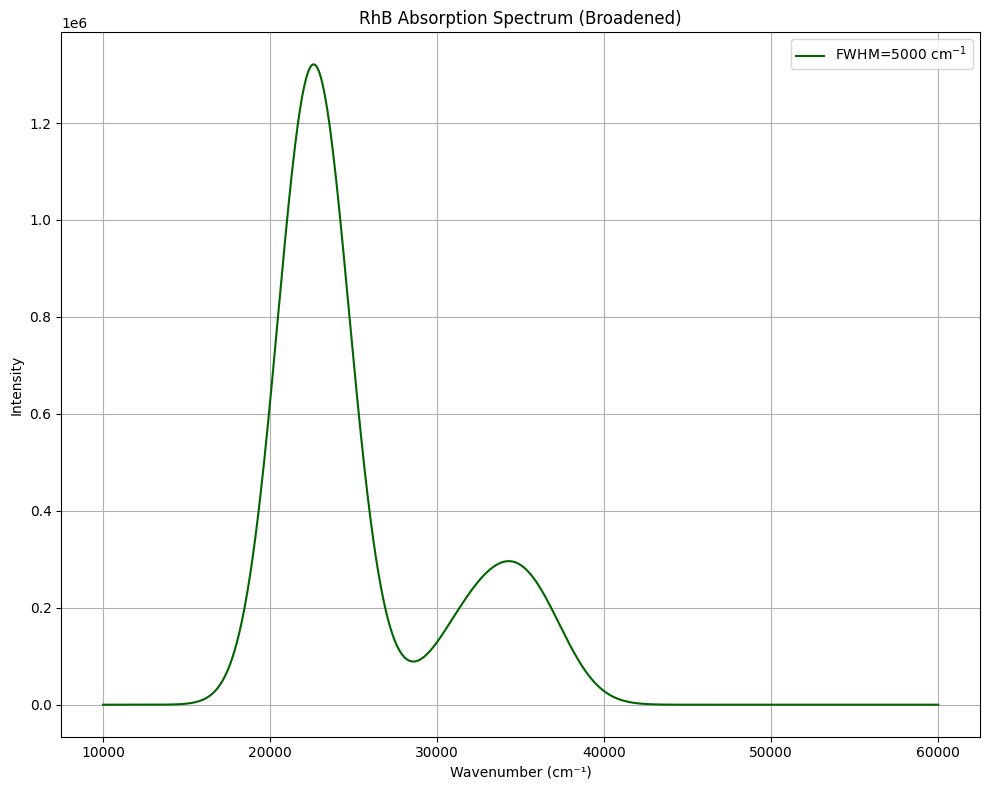

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# === USER PARAMETERS ===
fwhm = 5000  # Full Width at Half Maximum in cm^-1
nu_min = 10000  # Minimum wavenumber (cm^-1)
nu_max = 60000  # Maximum wavenumber (cm^-1)
resolution = 1.0  # Step size for spectrum grid (cm^-1)

input_file = "RhB_1_1_gs_opt_b3lyp_def2tzvp_10st_s_t_tddft_sp_cpcm_water.out.abs.stk"  # Your input stick spectrum file

# === READ STICK SPECTRUM ===
data = np.loadtxt(input_file)
wavenumbers = data[:, 0]
osc_strengths = data[:, 1]

# === CREATE WAVENUMBER GRID ===
nu_grid = np.arange(nu_min, nu_max, resolution)

# === CONVERT FWHM TO STANDARD DEVIATION ===
sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))

# === APPLY GAUSSIAN BROADENING ===
spectrum = np.zeros_like(nu_grid)
for i in range(len(wavenumbers)):
    gauss = osc_strengths[i] * np.exp(-0.5 * ((nu_grid - wavenumbers[i]) / sigma)**2)
    spectrum += gauss

# === SAVE WAVENUMBER VS INTENSITY ===
np.savetxt("broadened_spectrum_cm-1.dat",
           np.column_stack([nu_grid, spectrum]),
           header="Wavenumber(cm-1)    Intensity", fmt="%.2f %.6e")

# === CONVERT TO WAVELENGTH ===
wavelength_grid = 1e7 / nu_grid  # Convert to nm
sort_idx = np.argsort(wavelength_grid)
wavelength_grid = wavelength_grid[sort_idx]
spectrum_wavelength = spectrum[sort_idx]

# === SAVE WAVELENGTH VS INTENSITY ===
np.savetxt("broadened_spectrum_nm.dat",
           np.column_stack([wavelength_grid, spectrum_wavelength]),
           header="Wavelength(nm)    Intensity", fmt="%.2f %.6e")

# === PLOT RESULTS ===
plt.figure(figsize=(10, 8))

plt.plot(nu_grid, spectrum, label=f'FWHM={fwhm} cm$^{{-1}}$', color='darkgreen')
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Intensity")
plt.title("RhB Absorption Spectrum (Broadened)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("broadened_spectrum_plot.png", dpi=300)
plt.show()



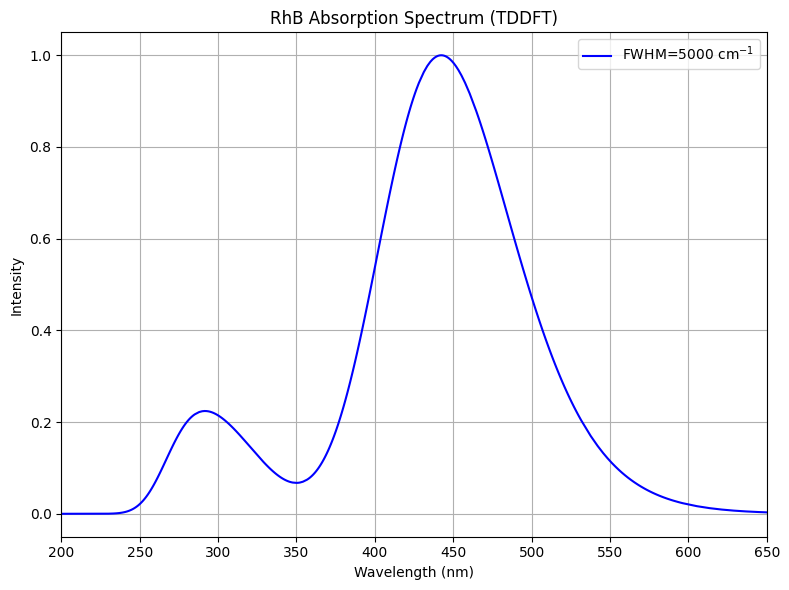

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt("broadened_spectrum_nm.dat", comments='#')
wavelength = data[:, 0]
intensity = data[:, 1]

# Normalize the intensity
intensity_normalized = intensity / np.max(intensity)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(wavelength, intensity_normalized, label=f'FWHM={fwhm} cm$^{{-1}}$', color='blue')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("RhB Absorption Spectrum (TDDFT)")
plt.xlim(200,650)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

